In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your datasets (replace with actual file paths)
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('missing_value.csv')

# Transpose the dataframes to switch rows and columns
df1_t = df1.T
df2_t = df2.T

# Check for missing values
missing_columns = df2_t.columns[df2_t.isnull().any()]
if missing_columns.empty:
    print("No missing values found.")
else:
    print("Columns with missing values:", missing_columns)

    # Initialize the DecisionTreeRegressor model
    regressor = DecisionTreeRegressor()

    # Iterate over each column with missing values
    for col in missing_columns:
        missing_indices = df2_t[col].isnull()
        # Check if there are any samples with complete data
        if not missing_indices.all():
            # Fit the model on rows with complete data
            regressor.fit(df1_t[~missing_indices], df2_t[col][~missing_indices])
            # Predict missing values
            df2_t[col][missing_indices] = regressor.predict(df1_t[missing_indices])
        else:
            print("No complete data found for column:", col)

# Transpose back to the original orientation
df2_imputed = df2_t.T

# Ensure the columns and index are in the correct order after transposition
df2_imputed.columns = df2.columns
df2_imputed.index = df2.index

# Round the values in the imputed DataFrame to not show decimal places
df2_imputed = df2_imputed.round(0)  # Change the argument to adjust decimal places

# Measure the performance for continuous data
mse = mean_squared_error(df1, df2_imputed)
mae = mean_absolute_error(df1, df2_imputed)
r2 = r2_score(df1.values.flatten(), df2_imputed.values.flatten())

print("\nMean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (coefficient of determination):", r2)

# Print the original, missing, and imputed dataframes
print("\nOriginal DataFrame (df1):")
print(df1)

print("\nDataFrame with Missing Values (df2):")
print(df2)

print("\nImputed DataFrame (df2_imputed):")
print(df2_imputed)



Columns with missing values: Index([3, 4, 7, 9, 12], dtype='int64')

Mean Squared Error: 132728.0
Mean Absolute Error: 100.57142857142857
R-squared (coefficient of determination): 0.9999580787488749

Original DataFrame (df1):
      2017    2018    2019
0   192274  201191  265954
1    25181   28523   26735
2     2024    2113    1904
3     4716    5544    8956
4     4105    4307    4481
5    16569   15405    4181
6     1939    2166    1622
7     2670    4952    5212
8    17937   18991   19968
9     4141    3139    2195
10      22      14      31
11      99     101     369
12      19       5      12
13      11       7       9

DataFrame with Missing Values (df2):
      2017      2018      2019
0   192274  201191.0  265954.0
1    25181   28523.0   26735.0
2     2024    2113.0    1904.0
3     4716       NaN    8956.0
4     4105    4307.0       NaN
5    16569   15405.0    4181.0
6     1939    2166.0    1622.0
7     2670    4952.0       NaN
8    17937   18991.0   19968.0
9     4141       NaN 

Columns with missing values: Index([3, 4, 7, 9, 12], dtype='int64')

Mean Squared Error: 545827.4523809524
Mean Absolute Error: 216.26190476190473
R-squared (coefficient of determination): 0.9998276040496182


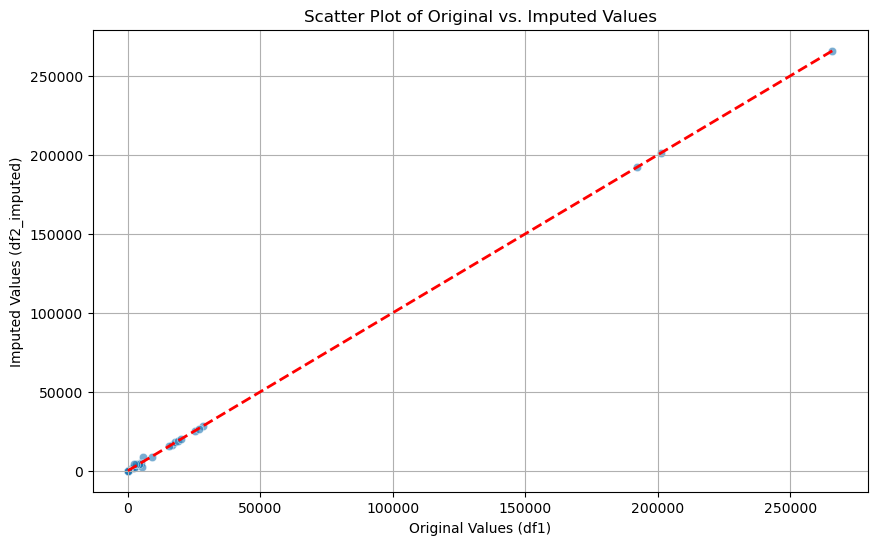

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets (replace with actual file paths)
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('missing_value.csv')

# Transpose the dataframes to switch rows and columns
df1_t = df1.T
df2_t = df2.T

# Check for missing values
missing_columns = df2_t.columns[df2_t.isnull().any()]
if missing_columns.empty:
    print("No missing values found.")
else:
    print("Columns with missing values:", missing_columns)

    # Initialize the DecisionTreeRegressor model
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()

    # Iterate over each column with missing values
    for col in missing_columns:
        missing_indices = df2_t[col].isnull()
        # Check if there are any samples with complete data
        if not missing_indices.all():
            # Fit the model on rows with complete data
            regressor.fit(df1_t[~missing_indices], df2_t[col][~missing_indices])
            # Predict missing values
            df2_t[col][missing_indices] = regressor.predict(df1_t[missing_indices])
        else:
            print("No complete data found for column:", col)

# Transpose back to the original orientation
df2_imputed = df2_t.T

# Ensure the columns and index are in the correct order after transposition
df2_imputed.columns = df2.columns
df2_imputed.index = df2.index

# Round the values in the imputed DataFrame to not show decimal places
df2_imputed = df2_imputed.round(0)

# Measure the performance for continuous data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(df1, df2_imputed)
mae = mean_absolute_error(df1, df2_imputed)
r2 = r2_score(df1.values.flatten(), df2_imputed.values.flatten())

print("\nMean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (coefficient of determination):", r2)

# Scatter plot for visualization
plt.figure(figsize=(10, 6))

# Flatten the data for comparison
df1_flattened = df1.values.flatten()
df2_imputed_flattened = df2_imputed.values.flatten()

plt.scatter(df1_flattened, df2_imputed_flattened, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([df1_flattened.min(), df1_flattened.max()], [df1_flattened.min(), df1_flattened.max()], 'r--', lw=2)

plt.title('Scatter Plot of Original vs. Imputed Values')
plt.xlabel('Original Values (df1)')
plt.ylabel('Imputed Values (df2_imputed)')
plt.grid(True)
plt.show()


In [8]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(raw_dataset)

NameError: name 'raw_dataset' is not defined